# Neural Network for Handwritten Digit Classification

- importing libraries
- load data
- initialize parameters
- write helper functions
- training
- testing
- check results with kaggle competition

### Importing libraries

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.metrics import mean_squared_error, confusion_matrix
import seaborn as sn

### Load Data

Let's firstly load and figure out our data

In [2]:
def load_data():
    with np.load("data/mnist.npz") as f:
        x_train = f["x_train"]
        y_train = f["y_train"]

        x_test = f["x_test"]
        y_test = f["y_test"]

        x_train_transformed = x_train / 255
        x_train_flatten = x_train_transformed.reshape(x_train.shape[0], 784, 1)
        y_train_flatten = np.eye(10)[y_train]

        x_test_transformed = x_test / 255
        x_test_flatten = x_test_transformed.reshape(x_test.shape[0], 784, 1)
        y_test_flatten = np.eye(10)[y_test]

        return x_train_flatten, y_train_flatten, x_test_flatten, y_test_flatten
    

In [3]:
train_X, train_y, test_X, test_y = load_data()
print(f"shape of train X: {train_X.shape}")
print(f"shape of train y: {train_y.shape}")
print(f"shape of test X: {test_X.shape}")
print(f"shape of test y: {test_y.shape}")

shape of train X: (60000, 784, 1)
shape of train y: (60000, 10)
shape of test X: (10000, 784, 1)
shape of test y: (10000, 10)


Let's plot some example of trainig data. For this we will reshape our example from (784, 1) to (28, 28)

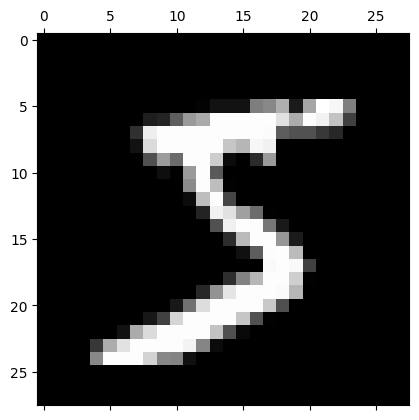

In [4]:
example_data_X = train_X[0].reshape((28, 28))

plt.matshow(example_data_X, cmap="gray")

Our first example is number 5, then let's see what correspond this example in **train_y** data

In [5]:
example_data_Y = train_y[0]
print(example_data_Y)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


We see an array of 10 elements, and sixth element of this array is 1 and others are 0. That is the way in which we mark our numbers. So number:
- zero correspond to array [1 0 0 0 0 0 0 0 0 0]
- one - [0 1 0 0 0 0 0 0 0 0] and so on.

Finally, we have better understanding what our data looks like. Then we move on to the next section which is *Initialize parameters*

### Initialize parameters

For neural network we need some parameters. Let's write a function for this task

In [6]:
def initialize_parameters():
    W1 = np.random.randn(20, 784) * 0.001
    b1 = np.zeros((20, 1))

    W2 = np.random.randn(10, 20) * 0.001
    b2 = np.zeros((10, 1))

    return W1, b1, W2, b2

In [7]:
W1, b1, W2, b2 = initialize_parameters()

In [8]:
epochs = 5
m = train_X.shape[0]
count = 0

### Write Helper functions

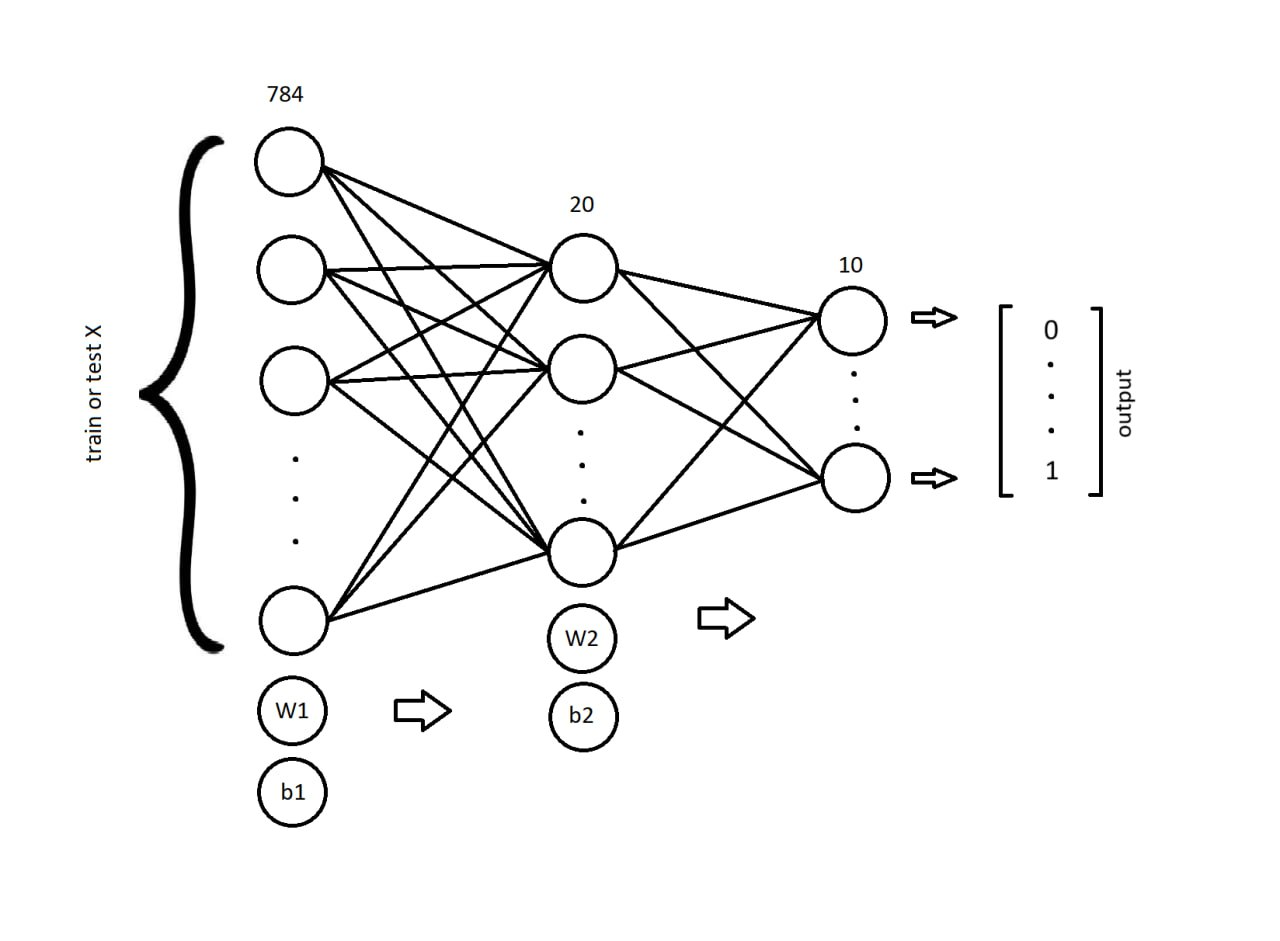

In [9]:
def forward_propagation(X, W1, b1, W2, b2):
     Z1_pre = np.dot(W1, X) + b1
     A1 = np.tanh(Z1_pre)

     Z2_pre = np.dot(W2, A1) + b2
     A2 = np.tanh(Z2_pre)

     return A1, A2

In [10]:
def update_parameters(W, b, dW, db, learning_rate=0.005):
     new_W = W - learning_rate * dW
     new_b = b - learning_rate * db
     return new_W, new_b

In [11]:
def backward_propagation(X, Y, A2, A1):
     global W2, b2, W1, b1

     dZ2 = A2 - Y
     dW2 = np.dot(dZ2, A1.T)
     db2 = np.sum(dZ2, axis=1, keepdims=True)

     W2, b2 = update_parameters(W2, b2, dW2, db2)

     dZ1 = np.dot(W2.T, dZ2) * (1 - A1**2)
     dW1 = np.dot(dZ1, X.T)
     db1 = np.sum(dZ1, axis=1, keepdims=True)

     W1, b1 = update_parameters(W1, b1, dW1, db1)

     return W2, b2, W1, b1

In [12]:
def check_result(A2, Y):
     global count
     
     if np.argmax(A2) == np.argmax(Y):
          count += 1

In [13]:
def predict(image, W1, b1, W2, b2):

    Z1_pre = np.dot(W1, image) + b1
    A1 = np.tanh(Z1_pre)

    Z2_pre = np.dot(W2, A1) + b2
    A2 = np.tanh(Z2_pre)

    return np.argmax(A2)

### Training

In [14]:
mse = []      # list for loss
accuracy = [] # list for accuracy

for epoch in range(epochs):
     y_true = []
     y_pred = []

     for i in range(m):
          Y = train_y[i]
          Y.shape += (1,)
          X = train_X[i]

          A1, A2 = forward_propagation(X, W1, b1, W2, b2)

          W2, b2, W1, b1 = backward_propagation(X, Y, A2, A1)

          check_result(A2, Y)

          Y = np.squeeze(Y)
          A2n = np.squeeze(A2)
          
          y_true.append(Y)
          y_pred.append(A2n)

     res_mse = mean_squared_error(y_true, y_pred)
     acc = round(count / m * 100, 2)
     
     mse.append(res_mse)
     accuracy.append(acc)

     print(f"Accuracy: {acc}%, loss: {res_mse}")
     
     count = 0

Accuracy: 85.44%, loss: 0.03041955275818236
Accuracy: 91.4%, loss: 0.018620747028112214
Accuracy: 91.93%, loss: 0.016929642080952174
Accuracy: 92.32%, loss: 0.016012161957960746
Accuracy: 92.66%, loss: 0.015255550824099032


**Plot loss and accuracy**

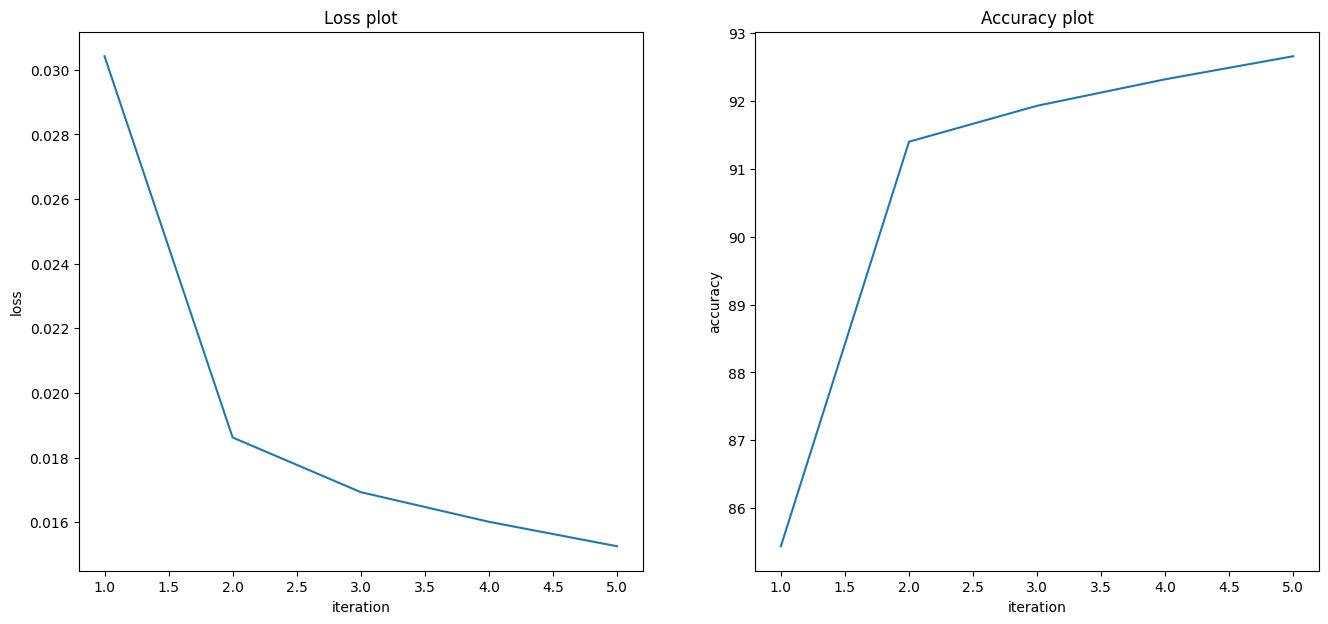

In [15]:
epochs = [epoch for epoch in range(1, epochs + 1)]
fig, axs = plt.subplots(1, 2, figsize=(16, 7))

axs[0].set_title("Loss plot")
axs[0].set_xlabel("iteration")
axs[0].set_ylabel("loss")
axs[0].plot(epochs, mse)

axs[1].set_title("Accuracy plot")
axs[1].set_xlabel("iteration")
axs[1].set_ylabel("accuracy")
axs[1].plot(epochs, accuracy)


### Testing
useful links:
- confusion matrix - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
- heatmap - https://seaborn.pydata.org/generated/seaborn.heatmap.html 

<Axes: >

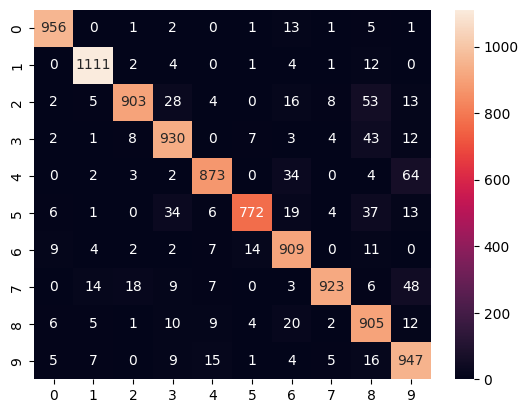

In [16]:
y_test_prepared = [np.argmax(t_y) for t_y in test_y]
y_pred = [predict(t_x, W1, b1, W2, b2) for t_x in test_X]

cm = confusion_matrix(y_test_prepared, y_pred)
sn.heatmap(cm, annot=True, fmt="d")

### Check results with kaggle competition

**https://www.kaggle.com/competitions/digit-recognizer**

in test.csv and train.csv we have exactly the same data which in mnist.npz, so we can skeep steps for training and just do testing

In [20]:
df_test = pd.read_csv("data/test.csv")
df_test.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


In [21]:
df_test.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
data_test = df_test.to_numpy()
data_test.shape

(28000, 784)

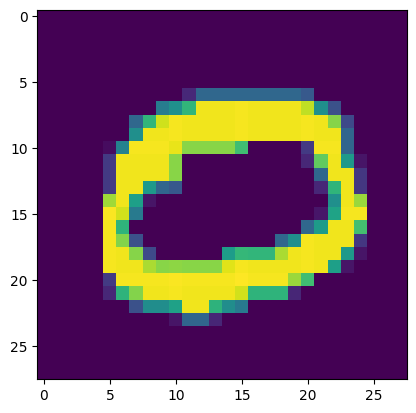

In [23]:
plt.imshow(data_test[1].reshape((28, 28)))

In [27]:
res = []
for i in range(28_000):
    
     X = data_test[i]
     X.shape += (1,)
     X = X / 255
     
     res.append(predict(X, W1, b1, W2, b2))

In [28]:
df_result = pd.read_csv("data/sample_submission.csv")
df_result.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [29]:
df_result["Label"] = res
df_result.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [30]:
df_result.describe()

,ImageId,Label
count,28000.000000,28000.000000
mean,14000.500000,4.551393
std,8083.048105,2.936085
min,1.000000,0.000000
25%,7000.750000,2.000000
50%,14000.500000,5.000000
75%,21000.250000,7.000000
max,28000.000000,9.000000


In [31]:
df_result.to_csv("data/result.csv", index=False)

After all work we need to submit **result.csv** and in my case I receive 92% of accuracy